In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [25]:
df_interpolate = pd.read_excel('preprocessed_zahra.xlsx')
df_interpolate = df_interpolate.sort_values("datetime")
df_interpolate

,unix_time,datetime,person,value,confidence,activity,sleep_duration,stress_lvl
0,1706035047,2024-01-23 19:37:27,Zahra,NaN,0.0,Chill,0.0,0.0
1,1706035053,2024-01-23 19:37:33,Zahra,NaN,0.0,Chill,0.0,NaN
2,1706035058,2024-01-23 19:37:38,Zahra,NaN,0.0,Chill,0.0,NaN
3,1706035063,2024-01-23 19:37:43,Zahra,NaN,0.0,Chill,0.0,NaN
4,1706035068,2024-01-23 19:37:48,Zahra,NaN,0.0,Chill,0.0,NaN
...,...,...,...,...,...,...,...,...
192406,1707058140,2024-02-04 15:49:00,Zahra,NaN,NaN,Chill,8.0,2.0
192407,1707058920,2024-02-04 16:02:00,Zahra,NaN,NaN,Chill,8.0,2.0
192408,1707060660,2024-02-04 16:31:00,Zahra,NaN,NaN,Chill,8.0,2.0
192409,1707080700,2024-02-04 22:05:00,Zahra,NaN,NaN,Chill,8.0,4.0


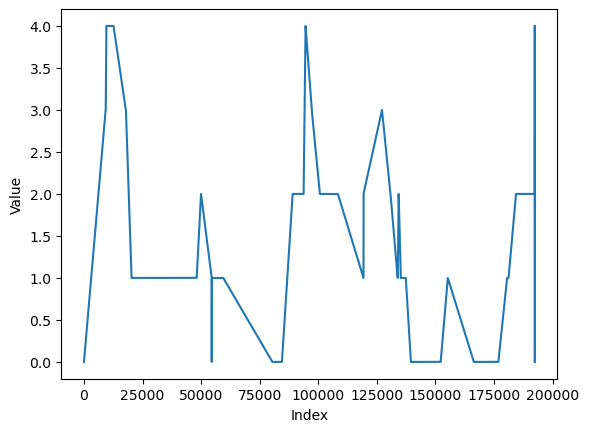

In [26]:
df_interpolate_stresslvl = df_interpolate.copy()
df_interpolate_stresslvl.set_index('datetime', inplace=False)
df_interpolate_stresslvl['stress_lvl'] = df_interpolate_stresslvl['stress_lvl'].interpolate(method="linear")

plt.plot(df_interpolate_stresslvl['stress_lvl'])
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

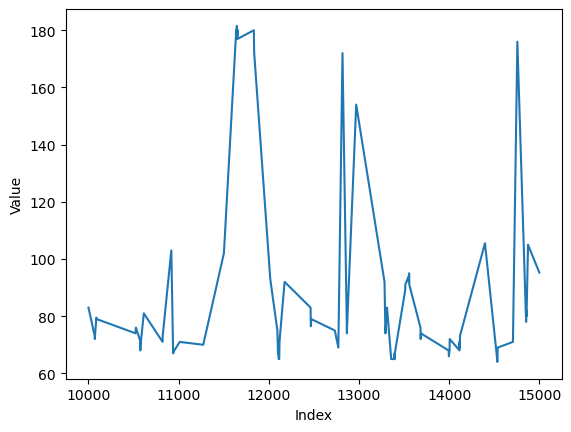

In [27]:
df_interpolate_values = df_interpolate_stresslvl.copy()
df_interpolate_values['value'] = df_interpolate_values['value'].interpolate(method="linear")

#plt.plot(df_interpolate_values['value'])

start_index = 10000
end_index = 15000


plt.plot(df_interpolate_values.index[start_index:end_index+1], df_interpolate_values['value'].iloc[start_index:end_index+1])

plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

In [28]:
df_interpolate_values

,unix_time,datetime,person,value,confidence,activity,sleep_duration,stress_lvl
0,1706035047,2024-01-23 19:37:27,Zahra,NaN,0.0,Chill,0.0,0.000000
1,1706035053,2024-01-23 19:37:33,Zahra,NaN,0.0,Chill,0.0,0.000323
2,1706035058,2024-01-23 19:37:38,Zahra,NaN,0.0,Chill,0.0,0.000645
3,1706035063,2024-01-23 19:37:43,Zahra,NaN,0.0,Chill,0.0,0.000968
4,1706035068,2024-01-23 19:37:48,Zahra,NaN,0.0,Chill,0.0,0.001291
...,...,...,...,...,...,...,...,...
192406,1707058140,2024-02-04 15:49:00,Zahra,121.0,NaN,Chill,8.0,2.000000
192407,1707058920,2024-02-04 16:02:00,Zahra,121.0,NaN,Chill,8.0,2.000000
192408,1707060660,2024-02-04 16:31:00,Zahra,121.0,NaN,Chill,8.0,2.000000
192409,1707080700,2024-02-04 22:05:00,Zahra,121.0,NaN,Chill,8.0,4.000000


In [37]:
import pandas as pd

def interpolate(input_file, output_file):
    # Read the input Excel file
    df = pd.read_excel(input_file)
    
    # Sort the DataFrame by datetime
    df.sort_values("datetime", inplace=True)
    
    # Set datetime as index for interpolation
    df.set_index('datetime', inplace=True)
    
    # Interpolate stress levels and values using linear method
    df['stress_lvl'] = df['stress_lvl'].interpolate(method="linear")
    df['value'] = df['value'].interpolate(method="linear")
    
    # Plot stress_lvl
    plt.figure(figsize=(10, 5))
    plt.plot(df['stress_lvl'])
    plt.xlabel('Datetime')
    plt.ylabel('Stress Level')
    plt.title('Stress Level over Time')
    plt.grid(True)
    plt.show()
    
    # Plot value
    plt.figure(figsize=(10, 5))
    plt.plot(df['value'])
    plt.xlabel('Datetime')
    plt.ylabel('Value')
    plt.title('Value over Time')
    plt.grid(True)
    plt.show()
    
    # Reset the index
    df.reset_index(inplace=True)
    
    # Write the interpolated DataFrame to an Excel file
    df.to_excel(output_file, index=False, columns=['unix_time', 'datetime', 'person', 'value', 'confidence', 'activity', 'sleep_duration', 'stress_lvl'])

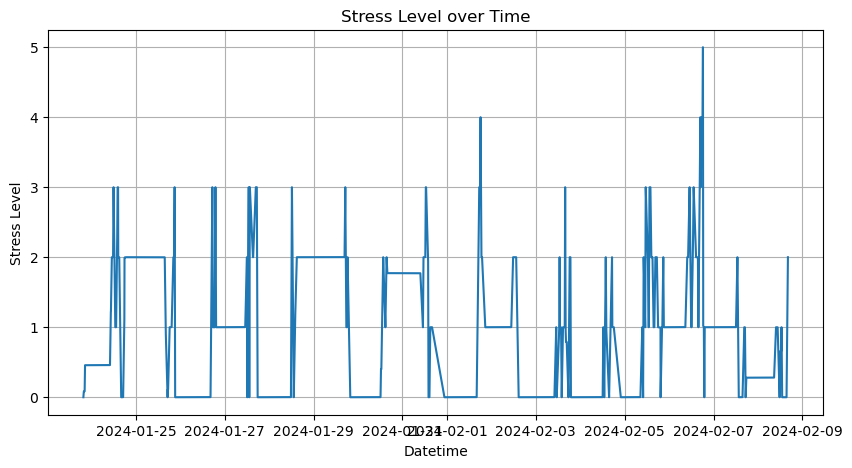

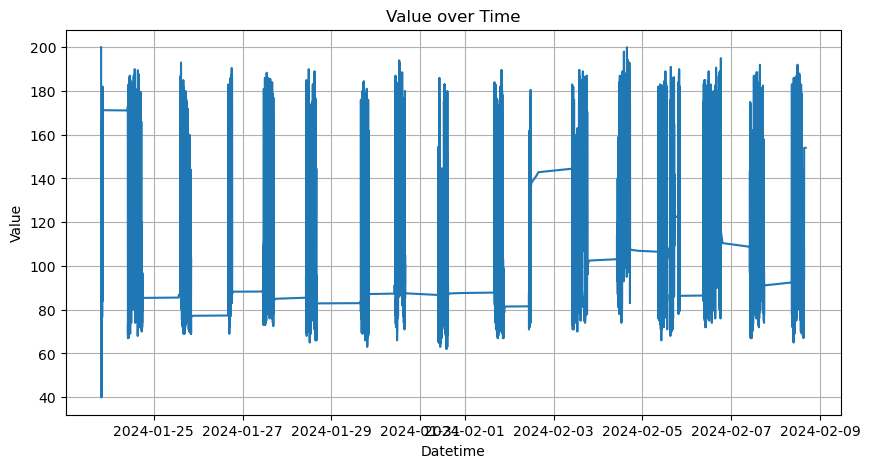

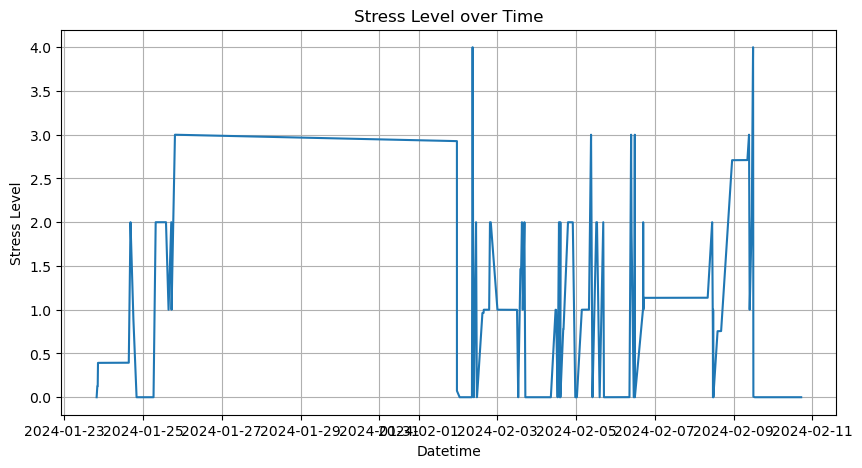

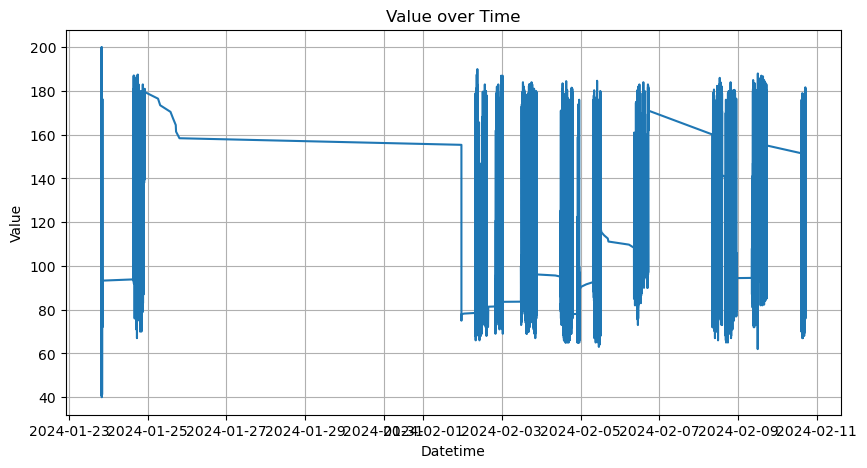

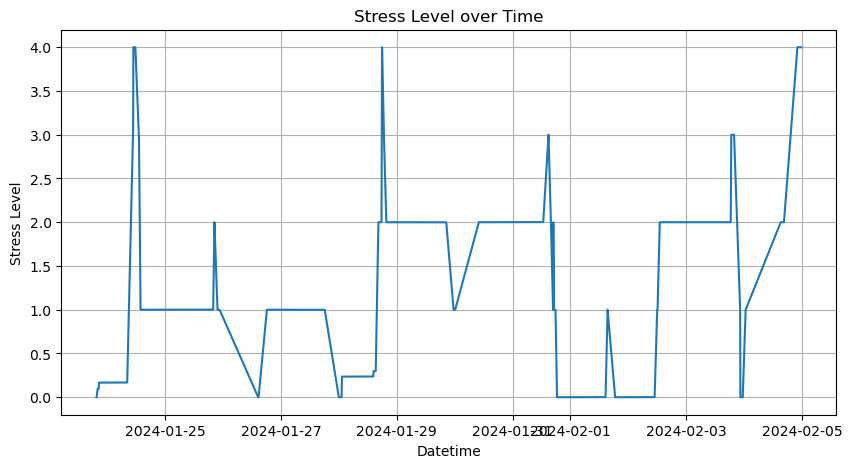

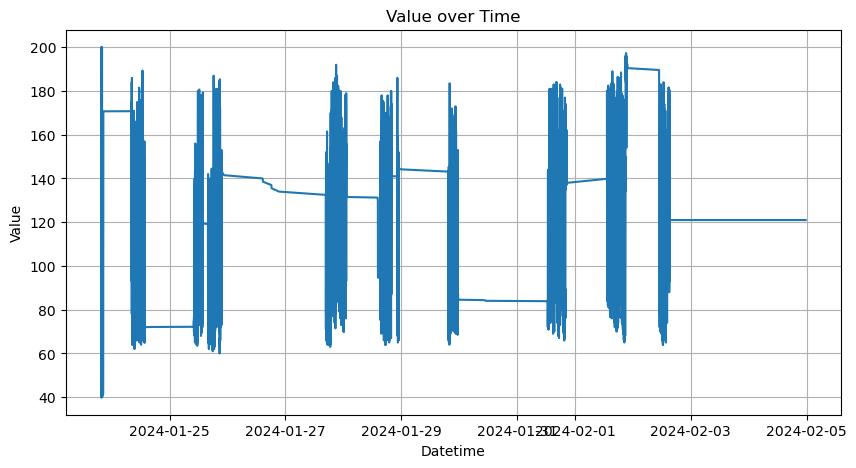

In [38]:
interpolate('preprocessed_anh.xlsx', 'interpolated_anh.xlsx')
interpolate('preprocessed_khang.xlsx', 'interpolated_khang.xlsx')
interpolate('preprocessed_zahra.xlsx', 'interpolated_zahra.xlsx')